### create su data from matlab

### load a su file with the same time steps and trace number with the one you would like to create

In [30]:
import sys 
import obspy
import numpy as np
from seisflows.plugins import adjoint, misfit, readers, writers
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt 
from obspy.core import Stream, Trace

from scipy.io import loadmat

import shutil

# define seismic data reader and writer
reader = getattr(readers,'su')
writer = getattr(writers, 'su')


#data1 = reader('obf/input/','UpemFan01_SRC08_ts350_mat.su')

#data1 = reader('obf/input/','Up_csic_zistf_dj_trstar090_trend091_chi_f03000000_DT4d_9.su')
data1 = reader('obf/input/','Up_sp_mid_20181203_istf_1src_60rec_350k_650k_f0500000_DT4d_8.su')


#data1[0].stats.sampling_rate = 1/4e-8
data2 = data1.copy()

# data_mat_filename = 'Fan07_SRC08_ts2500_mat'
# data_mat_path ='obf/input/' + data_mat_filename + '.mat'

# from scipy.io import loadmat
# matfile2=loadmat(data_mat_path)
# data_mat_numpy = matfile2['fan_beam_scan_full']



### constant preparation 

UpSampleFactor : 0.8000000000000000444 
sampling rate fsNewsyncomp after resampling : 25000000.000000 Hz
26
2359
('freq_step_starNewobs', 33)
('freq_step_endNewobs', 2949)
('freq_step_starNewsyn', 33)
('freq_step_endNewsyn', 2949)
textplot- run


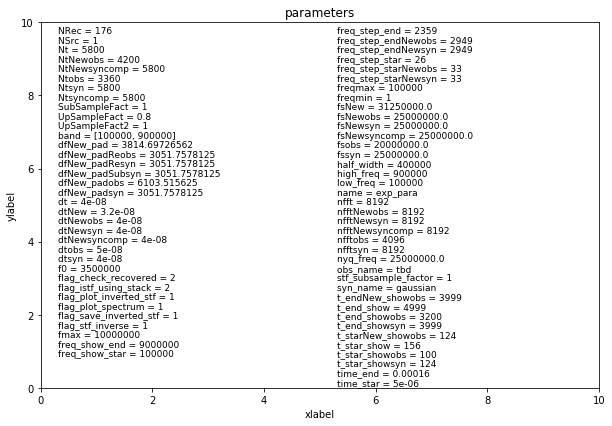

In [31]:
#a default value
save_exp_para_pickledump_fn='0'
execfile('plib_load.py')
execfile('pconstant_setup.py')

### looping through both Fans and all traces for su files creation (needs to clear the [0]* folders before running) 

In [32]:
for i in range(1,2):
    # convert mat to numpy from
    #data_obs_filename = 'Fan%02d_SRC08_mat_2500' % i
#     data_obs_filename = 'Fan%02d_SRC08_ts2500_mat' % i
    data_obs_filename = 'emFan%02d_SRC08_ts350_mat' % i
    data_obs_path ='obf/input/' + data_obs_filename + '.mat'
    matfile2=loadmat(data_obs_path)
    data_obs = matfile2['fan_beam_scan_full']
    print('i is',i)
    i2= (i-1) 
    dir='obf/output/%06d' % i2
    if os.path.exists(dir):
       shutil.rmtree(dir)
    os.makedirs(dir)     
    save_su_fn = '%06d/' % i2 
    data_su_path='obf/output/' + save_su_fn + 'Up' + 'freqmin' + str(freqmin) + 'freqmax' + str(freqmax) +  data_obs_filename +'.su'
#     save_su_fn = '%06d/Up_file_single' % i2 
#     data_su_path='obf/output/' + save_su_fn + '.su'
    print('data_su_path:',data_su_path)
    ##### run once would be enough
    ##data_Re_obs=np.zeros((Ntsyncomp,176))
#     for trace_num in range(58,119,1):
    for trace_num in range(0,61,1):
#         print('trace_num is',trace_num)
        ## interpolation for the observed data 
        trace_obs = data_obs[:,trace_num]
        tck = interpolate.splrep(t_total_obs, trace_obs, s=0)
        traceNew_obs = interpolate.splev(t_totalNew_obs, tck, der=0)
        #data_Re_obs[:,trace_num] = traceNew_obs[0:]
        Ntcomp = NtNewsyncomp
        ## manual delay for the observed data
        time_delay=0
        a = np.zeros(np.abs(time_delay))
        
        #traceNew_obs_dj = -np.append(a,traceNew_obs[0:Ntsyn-time_delay], axis=0)
        ### !!! this is to adjust the amplitude (AJ) using previously calculated arrays of syn/obs
#        traceNew_obs_dj = -np.append(a,traceNew_obs[0:Ntsyn-time_delay], axis=0)*np.mean(ratio_obs_syn2[trace_plot])* np.mean(ratio_obs_syn3)
        traceNew_obs_dj = -np.append(a,traceNew_obs[0:Ntsyn-time_delay], axis=0)*0.00017646017504814167
        #Ntsyn = traceNew_obs_dj
        ### padding zeros to match the deserved obs data
        a = np.zeros(np.abs(Ntsyncomp - len(traceNew_obs_dj)))
        traceNew_obs_dj_full = np.append(traceNew_obs_dj,a, axis=0)
        filtered_syn = traceNew_obs_dj_full
        ### bandpass filtering to match the inverted stf within the same frequency band
        filtered_syn = bandpass(traceNew_obs_dj_full, freqmin, freqmax, fsNewobs, zerophase=True)
        traceNew_obs_dj_filt_subsample = filtered_syn[0:Ntsyncomp:SubSampleFact]
        new_trace_number = trace_num  - 57 
        #print('trace_num is',new_trace_number)
        data2[new_trace_number].data[:] = traceNew_obs_dj_filt_subsample
        ## fix a default delta t error
        data2[new_trace_number].stats.sampling_rate = 1/4e-4
        ##data2[new_trace_number].stats.delta = 0.0004
    #### save data or not    
    #pickle.dump(data_Re_obs,open(save_Re_obs_pickledump_fn,'wb'))
    
    data2.write(data_su_path,format='SU')

('i is', 1)
('data_su_path:', 'obf/output/000000/Upfreqmin1freqmax100000emFan01_SRC08_ts350_mat.su')


In [27]:
freqmax

100000

In [9]:
Ntsyncomp

5800

In [10]:
Ntsyn

5800

In [11]:
t_total_obs.shape

(3360,)

In [12]:
t_totalNew_obs.shape

(4200,)

In [13]:
filtered_syn.shape

(5800,)

In [14]:
data2

61 Trace(s) in Stream:

... | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:02.319600Z | 2500.0 Hz, 5800 samples
...
(59 other traces)
...
... | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:02.319600Z | 2500.0 Hz, 5800 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [15]:
data1

61 Trace(s) in Stream:

... | 1970-01-01T00:00:00.000000Z - 1970-01-01T01:36:39.000000Z | 1.0 Hz, 5800 samples
...
(59 other traces)
...
... | 1970-01-01T00:00:00.000000Z - 1970-01-01T01:36:39.000000Z | 1.0 Hz, 5800 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

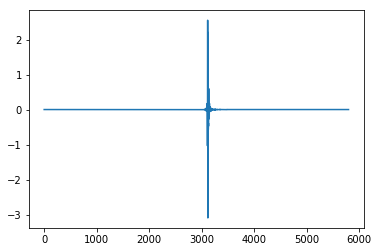

In [16]:
plt.plot(filtered2_trace_Re_syn)

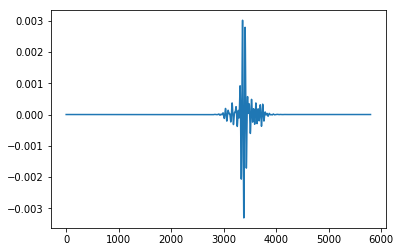

In [17]:
plt.plot(filtered2_trace_interp_obs)

### plot the comparison in signal and spectrum, for the regenerated su observed data and the synthetic data using the istf

('ratio_obs_syn', 2.771333221163936, 'absratio_obs_syn', 2.771333221163936)
('ratio_obs_syn', 5.490094944242888, 'absratio_obs_syn', 5.490094944242888)
('ratio_obs_syn', 2.524601425746268, 'absratio_obs_syn', 2.524601425746268)


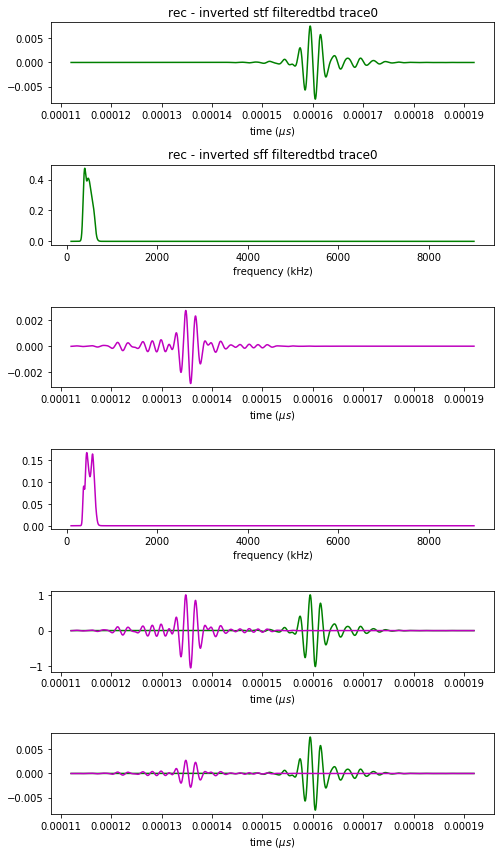

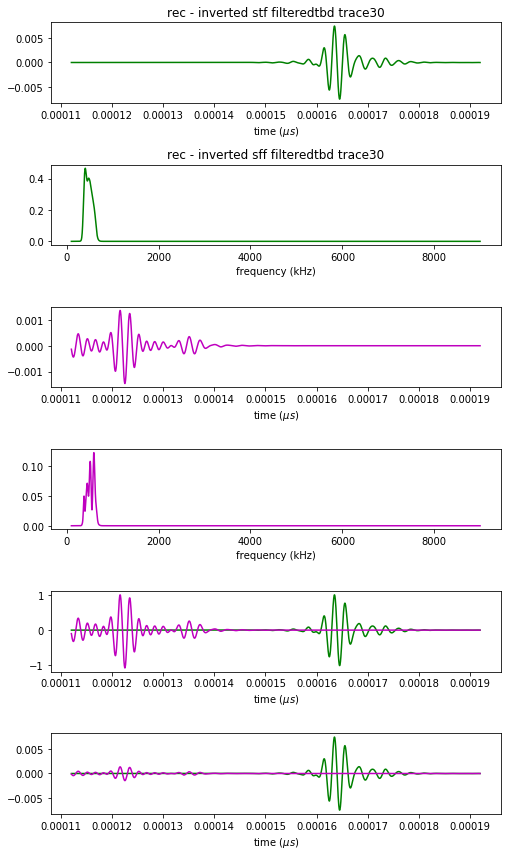

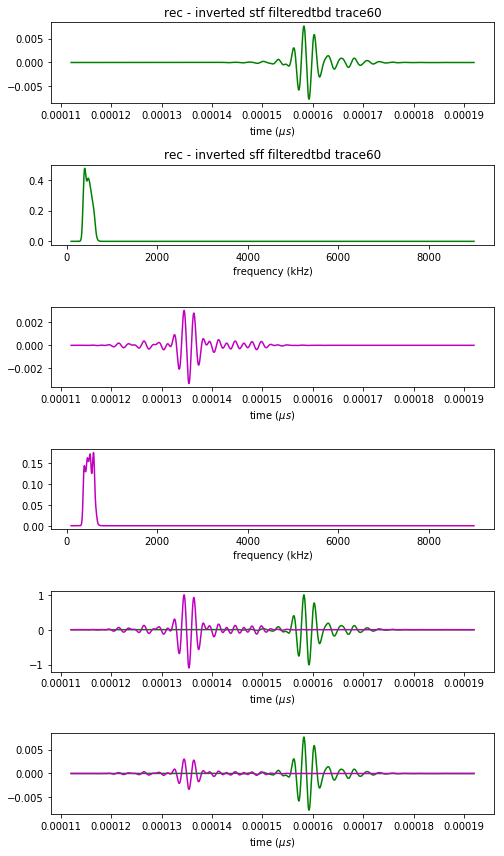

In [18]:
#trace_plot = 2

t_starNew_showobs = 2800
t_endNew_showobs = 4800

ratio_obs_syn = np.zeros(61)
abs_ratio_obs_syn = np.zeros(61)
for trace_plot in range(0,61,30):

    filtered2_trace_Re_syn = data1[trace_plot].data[:]
    filtered2_trace_interp_obs_temp = data2[trace_plot].data[:]
    
    filtered2_trace_interp_obs = bandpass(filtered2_trace_interp_obs_temp, freqmin, freqmax, fsNewobs, zerophase=True)
    yf_filtered2_trace_Re_syn = fft(filtered2_trace_Re_syn, axis=0, n=nfftNewsyncomp)
    yf_filtered2_trace_interp_obs = fft(filtered2_trace_interp_obs, axis=0, n=nfftNewsyncomp)


    filtered2_trace_Re_syn_max = np.max(filtered2_trace_Re_syn)
    filtered2_trace_interp_obs_max = np.max(filtered2_trace_interp_obs)
    ratio_obs_syn[trace_plot] = filtered2_trace_Re_syn_max/filtered2_trace_interp_obs_max
    abs_ratio_obs_syn[trace_plot] = abs(abs(filtered2_trace_Re_syn_max)/abs(filtered2_trace_interp_obs_max))
    
    print('ratio_obs_syn',ratio_obs_syn[trace_plot],'absratio_obs_syn',abs_ratio_obs_syn[trace_plot])
   # print()
    fig, (ax6,ax7,ax8,ax9,ax10,ax11) = plt.subplots(nrows=6)

    ax6.plot(t_totalNew_comp[t_starNew_showobs:t_endNew_showobs],filtered2_trace_Re_syn[t_starNew_showobs:t_endNew_showobs],'g-')
    ax6.set_title('rec - inverted stf filtered' + str(obs_name) + ' trace' + str(trace_plot))
    #ax6.set_xlabel('time (us)')
    ax6.set_xlabel(r'time ($\mu s$)')

    ax7.plot(xf_Newobs[freq_step_starNewobs:freq_step_endNewobs]/1000,np.abs(yf_filtered2_trace_Re_syn[freq_step_starNewobs:freq_step_endNewobs]),'-g')
    ax7.set_title('rec - inverted sff filtered' + str(obs_name) + ' trace' + str(trace_plot) )
    ax7.set_xlabel('frequency (kHz)')

    ax8.plot(t_totalNew_comp[t_starNew_showobs:t_endNew_showobs],filtered2_trace_interp_obs[t_starNew_showobs:t_endNew_showobs],'m-')
    #ax8.set_title('rec - inverted stf trace filtered' + str(obs_name) + ' star_trace '+str(inv_trace_num_star)+ 'end_trace '+str(inv_trace_num_end))
    ax8.set_xlabel(r'time ($\mu s$)')

    ax9.plot(xf_Newobs[freq_step_starNewobs:freq_step_endNewobs]/1000,np.abs(yf_filtered2_trace_interp_obs[freq_step_starNewobs:freq_step_endNewobs]),'-m')
    #ax9.set_title('rec- inverted sff trace filtered' + str(obs_name) + ' star_trace '+str(inv_trace_num_star)+ 'end_trace '+str(inv_trace_num_end))
    ax9.set_xlabel('frequency (kHz)')

    ax10.plot(t_totalNew_comp[t_starNew_showobs:t_endNew_showobs],filtered2_trace_Re_syn[t_starNew_showobs:t_endNew_showobs]/filtered2_trace_Re_syn_max,'g-')
    ax10.plot(t_totalNew_comp[t_starNew_showobs:t_endNew_showobs],filtered2_trace_interp_obs[t_starNew_showobs:t_endNew_showobs]/filtered2_trace_interp_obs_max,'m-')
    #ax8.set_title('rec - inverted stf trace filtered' + str(obs_name) + ' star_trace '+str(inv_trace_num_star)+ 'end_trace '+str(inv_trace_num_end))
    ax10.set_xlabel(r'time ($\mu s$)')

    ax11.plot(t_totalNew_comp[t_starNew_showobs:t_endNew_showobs],filtered2_trace_Re_syn[t_starNew_showobs:t_endNew_showobs],'g-')
    ax11.plot(t_totalNew_comp[t_starNew_showobs:t_endNew_showobs],filtered2_trace_interp_obs[t_starNew_showobs:t_endNew_showobs],'m-')
    #ax8.set_title('rec - inverted stf trace filtered' + str(obs_name) + ' star_trace '+str(inv_trace_num_star)+ 'end_trace '+str(inv_trace_num_end))
    ax11.set_xlabel(r'time ($\mu s$)')

    plt.tight_layout(rect=[0, 0, 1.2, 3])
    

    save_filterd_data_trace_complete_fn = 'obf/output/' + 'src01_rec%02d_nofiltering.png' % (trace_plot)
#    save_filterd_data_trace_complete_fn = 'obf/output/' + 'src01_rec%02d_fmin%d_fmax%d.png' % (trace_plot,freqmin,freqmax)
    #u_receives_signals_fn = 'obf/output/csic/Re_trace_compare_src01_rec%02d.png' % (trace_num)plt.savefig(save_evaluate_stfsff_complete_fn,format='png', dpi=200, bbox_inches='tight')
    plt.savefig(save_filterd_data_trace_complete_fn,format='png', dpi=200, bbox_inches='tight')
    #fig.show()
    #plt.close()
    
    #add_slide_ze(save_filterd_data_trace_complete_fn,total_filename_pptx)

In [19]:
# current ratio difference mean
np.mean(ratio_obs_syn)

0.1768201572320179

In [ ]:
np.mean(abs_ratio_obs_syn)

In [ ]:
# 1st ratio difference mean
ratio_obs_syn2 = ratio_obs_syn

In [ ]:
#0.0002977570290314644
np.mean(ratio_obs_syn2)

In [ ]:
# 2nd ratio difference mean
ratio_obs_syn3 = ratio_obs_syn

In [ ]:
#0.5926314338308866
np.mean(ratio_obs_syn3)

In [ ]:
# 3rd ratio difference mean
ratio_obs_syn4 = ratio_obs_syn

In [ ]:
filtered2_trace_Re_syn.shape

In [ ]:
0.5926314338308866 * 0.0002977570290314644


In [ ]:



def parse_args():
    # Parse input arguments
    parser = argparse.ArgumentParser(description='Plot seismic section from SU data file.')

    # file and format flags
    parser.add_argument('file',
                        help='SU filename')

    parser.add_argument('-save',default='sismo.png',
                        help='SU filename')

    parser.add_argument('-cm', '--cmap', default='seismic',
                        help='Matplotlib colormap scheme.')

    parser.add_argument('-c', '--clip', type=float,
                        default='0',
                        help='Clip amplitudes [0-100]')

    parser.add_argument('-t', '--title', type=str,
                        default='',
                        help='Plot title.')

    parser.add_argument('-xint', '--x_interval', type=float,
                        default='1.0',
                        help='Offset axis tick spacing [km].')

    parser.add_argument('-yint', '--y_interval', type=float,
                        default='1.0',
                        help='Time axis tick spacing [s].')

    return parser.parse_args()


if __name__ == "__main__":

    args = parse_args()

    if args.clip < 0:
        args.clip = 0 
    elif args.clip > 100:
        args.clip = 100 

    stream = read(args.file, format='SU', byteorder='<')
    plot_section(stream,
                 cmap=args.cmap,
                 clip=(100-args.clip),
                 title=args.title,
                 x_interval=args.x_interval,
                 y_interval=args.y_interval)
    #plt.show()
    plt.savefig(args.save)





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

from obspy.core.stream import Stream

def _cscale(v, clip=100):
    """ Return limits for colormap.
    """
    perc = clip / 100.
    return -perc * abs(v).max(), perc * abs(v).max()

def _get_time(stream):
    """ Get fixed time vector for stream object.
    """
    dt = stream[0].stats.delta
    nt = len(stream[0].data)
    return np.arange(0, nt*dt, dt)

def _get_offsets(stream):
    """ Return offsets.
    """
    nr = len(stream)
    offsets = np.zeros(nr)
    scalco = stream[0].stats.su.trace_header.scalar_to_be_applied_to_all_coordinates

    # set scale to km
    if scalco == 0:
        scalco = 1e-3 # assume coords are in m
    else:
        scalco = 1.0e-3 / scalco

    for i, tr in enumerate(stream):
        offsets[i] = (tr.stats.su.trace_header.group_coordinate_x -
                      tr.stats.su.trace_header.source_coordinate_x) * scalco
    return offsets


def get_regular_ticks(v, interval):
    """ Returns regular tick intervals.
    """
    f = interp1d(v, range(len(v)))
    begin = int(v[0] / interval) * interval
    end = v[-1]
    tick_labels = np.arange(begin, end, interval)
    ticks = f(tick_labels)

    return ticks, tick_labels



def plot_section(stream, ax=None, cmap='seismic', clip=100, title='', x_interval=1.0, y_interval=1.0):
    """  Plots a seismic section from an obspy stream.

    Parameters
    ----------
    stream: Obspy stream object
        Obspy stream object created from a SU data file
    ax: Matplotlib Axes object
        Optional axis object
    cmap: str
        Matplotlib colormap option.
    clip: float
        Percentage value (0-100) for amplitude clipping
    title: str
        plot title
    x_interval: float
        Offset axis tick interval in km
    y_interval: float
        Time axis tick interval in km

    Raises
    ------
    NotImplementedError
        If stream object does not have SU format
    """

    # check format of stream
    if stream[0].stats._format != 'SU':
        raise NotImplemented('plot_section currently only supports streams for SU data files.')

    # get dimensions
    nr = len(stream)
    nt = len(stream[0].data)
    dt = stream[0].stats.delta
    d_aspect = nr / float(nt)

    # convert stream to image array
    data = _convert_to_array(stream)

    # default values
    fsize = 6
    scale_factor = 1.5

    
    if ax is None:
        fig, ax = plt.subplots(figsize=(fsize, scale_factor*fsize))

    im = ax.imshow(data, aspect=scale_factor*d_aspect, clim=_cscale(data, clip=clip))
    im.set_cmap(cmap)
    
#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.05)
    
    fig.colorbar(im,fraction=0.06, pad=0.04,extend='both')
    # labels
    ax.set_title(title)
    ax.set_xlabel('Receiver Number')
    ax.set_ylabel('Time [s]')

    #set ticks
    t = _get_time(stream)
    yticks, ytick_labels = get_regular_ticks(t, y_interval)
    ax.set_yticks(yticks)
    ax.set_yticklabels(ytick_labels)

    offsets =_get_offsets(stream)
    xticks, xtick_labels = get_regular_ticks(offsets, x_interval)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xtick_labels)

    
    
    return ax

    

In [ ]:
plot_section(data1,cmap='seismic', clip=100, title='', x_interval=0.00020, y_interval=1000.0)